# TRABALHO SIB

## Secção 1

### Exploração inicial e pré-processamento
• Rever toda a documentação disponível sobre o conjunto de dados.
• Carregar o conjunto de dados e realizar uma análise exploratória do mesmo.
• Realizar os passos necessários de preparação dos dados e pré-processamento,
incluindo possivelmente a geração de atributos, a sua seleção, o tratamento de
possíveis valores em falta, etc.

Esta etapa deve corresponder à secção 1 do Notebook onde deverá:
• descrever e caracterizar os dados atribuídos de acordo com a documentação/
literatura existente;
• descrever sucintamente as características dos dados disponíveis a partir da
análise exploratória inicial;
• descrever os passos de preparação dos dados e pré-processamento que efetuou,
justificando as suas escolhas;
• incluir os gráficos exploratórios iniciais que ilustrem as principais características
dos dados.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# para desenhar os gráficos dentro do notebook
import seaborn as sns
%matplotlib inline


• seq_id: unique identifier of each protein variants
• protein_sequence: amino acid sequence of each protein variant. The stability (as measured by tm) of protein is determined by its protein sequence. (Please note that most of the sequences in the test data have the same length of 221 amino acids, but some of them have 220 because of amino acid deletion.)
• pH: the scale used to specify the acidity of an aqueous solution under which the stability of protein was measured. Stability of the same protein can change at different pH levels.
• data_source: source where the data was published
• tm: target column. (Higher tm means the protein variant is more stable.)

In [140]:

#read the csv file into a dataframe
df_train = pd.read_csv(r"D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\train.csv")
df_train

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [141]:
df_test = pd.read_csv(r"D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\test.csv")
df_test

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [142]:
train_updates = pd.read_csv(r'D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\train_updates_20220929.csv')

In [143]:
df_append = pd.DataFrame()
df_append = df_append.append(df_test, ignore_index=True)
df_append = df_append.append(df_train, ignore_index=True)
df_append

C:\Users\maryg\AppData\Local\Temp\ipykernel_28660\1147155682.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\maryg\AppData\Local\Temp\ipykernel_28660\1147155682.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,seq_id,protein_sequence,pH,data_source,tm
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8.0,Novozymes,NaN
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
...,...,...,...,...,...
33798,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
33799,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
33800,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
33801,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [144]:
data=df_append

In [145]:
data.shape

(33803, 5)

Fazer drop dos valores dos indices que estavam no update

In [146]:
for seq_id in train_updates.seq_id:
    data = data.drop(index = seq_id)

In [147]:
data.shape

(31369, 5)

### Sumario dos dados

In [148]:
data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8.0,Novozymes,NaN
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN


In [149]:
data.describe()

,seq_id,pH,tm
count,31369.000000,31093.000000,29027.000000
mean,17151.875418,6.972951,49.099583
std,9913.215994,1.612990,13.967426
min,0.000000,1.990000,-1.000000
25%,8317.000000,7.000000,42.100000
50%,17631.000000,7.000000,48.000000
75%,25823.000000,7.000000,53.800000
max,33802.000000,64.900000,130.000000


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31369 entries, 0 to 33802
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31369 non-null  int64  
 1   protein_sequence  31369 non-null  object 
 2   pH                31093 non-null  float64
 3   data_source       28251 non-null  object 
 4   tm                29027 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ MB


In [151]:
data.isnull().sum()

seq_id                 0
protein_sequence       0
pH                   276
data_source         3118
tm                  2342
dtype: int64

In [152]:
data.shape

(31369, 5)

In [153]:
data.columns

Index(['seq_id', 'protein_sequence', 'pH', 'data_source', 'tm'], dtype='object')

In [154]:
data=data[data['pH']<14]

In [155]:
data.shape

(31065, 5)

### Visualização dos dados

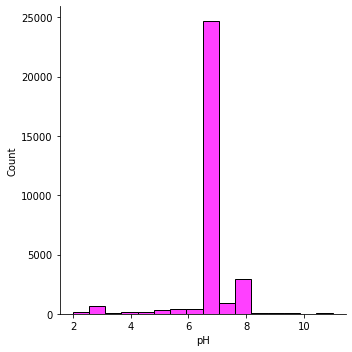

In [156]:
sns.displot(data=data,x='pH', color="magenta")
plt.xlabel("pH")
plt.show()

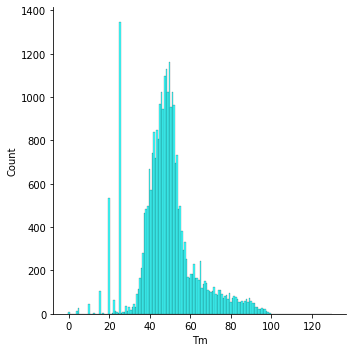

In [157]:
sns.displot(data=data,x='tm', color="cyan")
plt.xlabel("Tm")
plt.show()

# PCA

In [159]:
df = data[['tm', 'pH']].copy()
df=df.dropna()
df

,tm,pH
2413,75.7,7.0
2414,50.5,7.0
2415,40.5,7.0
2416,47.2,7.0
2417,49.5,7.0
...,...,...
33798,51.8,7.0
33799,37.2,7.0
33800,64.6,7.0
33801,50.7,7.0


In [160]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
data_scaled= preprocessing.scale(df)
n=2
pca = PCA(n_components=n)
pca.fit(data_scaled)
x_reduced = pca.transform(data_scaled)

print (pca.explained_variance_ratio_)
print('Shape before PCA: ', data_scaled.shape)
print('Shape after PCA: ', x_reduced.shape)

[0.53622135 0.46377865]
Shape before PCA:  (28723, 2)
Shape after PCA:  (28723, 2)


In [161]:
import plotly.express as px
fig = px.scatter(x_reduced, x=0, y=1)
fig.show()